In [ ]:
import pandas as pd
import numpy as np
import pickle
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# prepare the data for DiCE distance calculation

In [3]:
data_concat=pd.read_csv('./v2_analysis_indivilevel/v2_data/v2_data_concat.csv')
data_concat_outcome_0 = data_concat[data_concat['outcome']==0]
data_concat_outcome_0.reset_index(drop=True, inplace=True)

X = data_concat_outcome_0.drop('outcome', axis=1)
y = data_concat_outcome_0['outcome']
object = MinMaxScaler()
X_scaled=object.fit_transform(X.drop(['lat', 'lon'], axis=1))
X_scaled=pd.DataFrame(X_scaled, columns=X.drop(columns=['lat','lon']).columns)

X_coord=data_concat_outcome_0[['lat', 'lon']]
X_scaled_coord = pd.concat([X_coord, X_scaled], axis=1)

data_sacled_coord=X_scaled_coord.copy()
data_sacled_coord['outcome']=data_concat_outcome_0['outcome']

In [4]:
# scale the coordinate to assist the distance calculation
object_2 = MinMaxScaler()
X_scaled_whole=object.fit_transform(X)
df_scaled_whole=pd.DataFrame(X_scaled_whole, columns=X.columns)
df_scaled_whole['outcome']=data_concat_outcome_0['outcome']

In [5]:
with open("./v2_output_baselines/v2_dice_cfs_new", "rb") as fp:
    dice_exp = pickle.load(fp)

In [6]:
with open("./v2_output_baselines/total_counterfactuals.pkl", "rb") as fp:
    lst_object_cfs = pickle.load(fp)

In [7]:
final_cfs_dfs=lst_object_cfs[0].df_cf.iloc[:,:-1]
query_instance_df=lst_object_cfs[0].query_instance[:-1]

In [8]:
object_scaler_our= MinMaxScaler()
object_scaler_our.fit(X)

our_euc_all_instances=[]
our_manhattan_all_instances=[]
our_cosine_all_instances=[]
for j in range(len(lst_object_cfs)):
    final_cfs_dfs=lst_object_cfs[j].df_cf.iloc[:,:-1]
    query_instance_df=lst_object_cfs[j].query_instance[:-1]
    
    
    query_instance_df_scaled=object_scaler_our.transform(query_instance_df.T)
    
    if len(final_cfs_dfs)!=0:
        final_cfs_dfs=object_scaler_our.transform(final_cfs_dfs)
    

    our_euc_per_instance=[]
    our_manhattan_per_instance=[]
    our_cosine_per_instance=[]
    for i in range(len(final_cfs_dfs)):
        point_1=query_instance_df_scaled.flatten()

        point_2=final_cfs_dfs[0,:].flatten()
        # Computing the Euclidean Distance
        euc_dist= distance.euclidean(point_1, point_2)
        our_euc_per_instance.append(euc_dist)
        # Computing the Manhattan Distance
        manhattan_dist = distance.cityblock(point_1, point_2)
        our_manhattan_per_instance.append(manhattan_dist)
        # Computing the cosine similarity distance
        cosine_sim = distance.cosine(point_1, point_2)
        our_cosine_per_instance.append(cosine_sim)
        
    our_euc_mean_perinstance=np.nanmean(our_euc_per_instance)
    our_manhattan_mean_perinstance=np.nanmean(our_manhattan_per_instance)
    our_cosine_mean_perinstance=np.nanmean(our_cosine_per_instance)
    
    our_euc_all_instances.append(our_euc_mean_perinstance)
    our_manhattan_all_instances.append(our_manhattan_mean_perinstance)
    our_cosine_all_instances.append(our_cosine_mean_perinstance)

/tmp/ipykernel_1518118/4050741089.py:35: RuntimeWarning: Mean of empty slice
  our_euc_mean_perinstance=np.nanmean(our_euc_per_instance)
/tmp/ipykernel_1518118/4050741089.py:36: RuntimeWarning: Mean of empty slice
  our_manhattan_mean_perinstance=np.nanmean(our_manhattan_per_instance)
/tmp/ipykernel_1518118/4050741089.py:37: RuntimeWarning: Mean of empty slice
  our_cosine_mean_perinstance=np.nanmean(our_cosine_per_instance)


In [9]:
# calculate the mean distance between one query instance and its counterfactuals
# we do not use dice_exp._cf_examples_list[i].test_instance_df to query the instance, because it is not scaled for coordinates.
euc_all_instances=[]
manhattan_all_instances=[]
cosine_all_instances=[]
for j in range(len(dice_exp._cf_examples_list)):
    final_cfs_dfs=dice_exp._cf_examples_list[j].final_cfs_df.iloc[:,:-1]
    query_instance_df=df_scaled_whole.iloc[j][:-1]

    euc_per_instance=[]
    manhattan_per_instance=[]
    cosine_per_instance=[]
    for i in range(len(final_cfs_dfs)):
        point_1=np.array(query_instance_df).flatten()
        point_2=np.array(final_cfs_dfs.iloc[i]).flatten()
        # Computing the Euclidean Distance
        euc_dist= distance.euclidean(point_1, point_2)
        euc_per_instance.append(euc_dist)
        # Computing the Manhattan Distance
        manhattan_dist = distance.cityblock(point_1, point_2)
        manhattan_per_instance.append(manhattan_dist)
        # Computing the cosine similarity distance
        cosine_sim = distance.cosine(point_1, point_2)
        cosine_per_instance.append(cosine_sim)
        
    euc_mean_perinstance=np.nanmean(euc_per_instance)
    manhattan_mean_perinstance=np.nanmean(manhattan_per_instance)
    cosine_mean_perinstance=np.nanmean(cosine_per_instance)
    
    euc_all_instances.append(euc_mean_perinstance)
    manhattan_all_instances.append(manhattan_mean_perinstance)
    cosine_all_instances.append(cosine_mean_perinstance)

/tmp/ipykernel_1518118/509190318.py:26: RuntimeWarning: Mean of empty slice
  euc_mean_perinstance=np.nanmean(euc_per_instance)
/tmp/ipykernel_1518118/509190318.py:27: RuntimeWarning: Mean of empty slice
  manhattan_mean_perinstance=np.nanmean(manhattan_per_instance)
/tmp/ipykernel_1518118/509190318.py:28: RuntimeWarning: Mean of empty slice
  cosine_mean_perinstance=np.nanmean(cosine_per_instance)


In [10]:
# Visualization

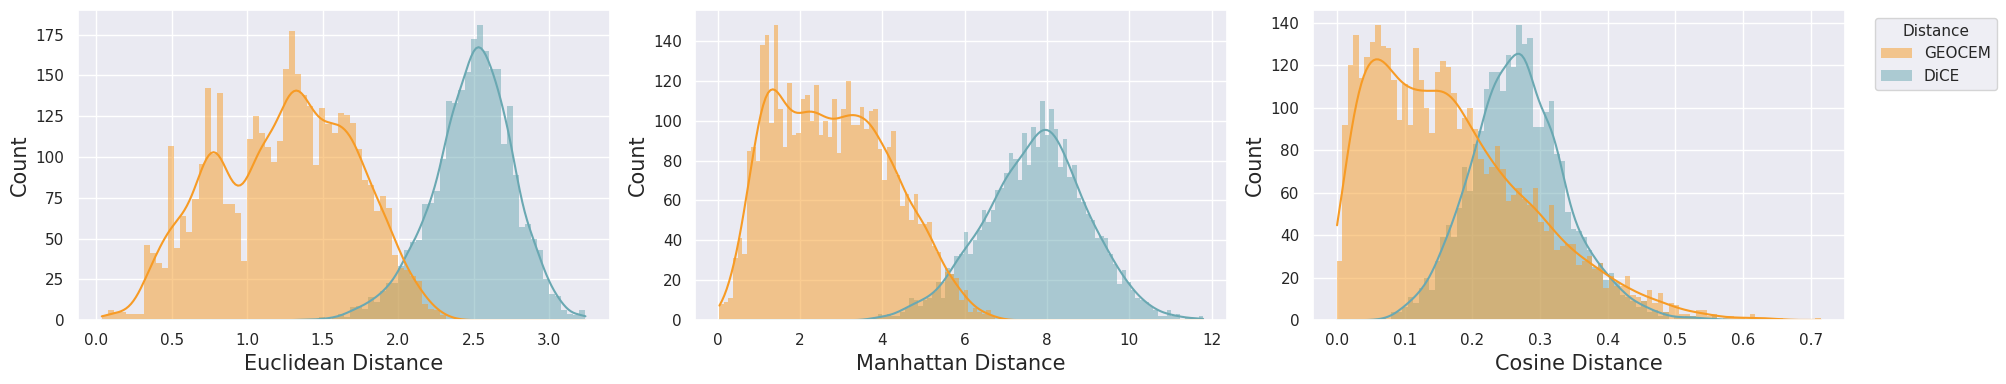

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(20,4))
sns.set_theme(style="darkgrid")
df_ourvsdice=pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'distance': our_euc_all_instances, 'Method': 'GEOCEM'}),
    pd.DataFrame.from_dict({'distance': euc_all_instances, 'Method': 'DiCE'})
])
colors = ["#f79b25", "#6aa8b2"]
# colors = ["#f79b25", "#98CFD7"]

# Set your custom color palette
sns.set_theme(style="darkgrid")
customPalette = sns.set_palette(sns.color_palette(colors))
sns.histplot(ax=axs[0], data = df_ourvsdice, x = "distance", kde = True, hue = "Method", element="step", linewidth=0.0001, binwidth=0.04, palette=customPalette, alpha=0.5)

axs[0].set_xlabel('Euclidean Distance', fontsize=15)
axs[0].set_ylabel('Count', fontsize=15)
axs[0].legend([],[], frameon=False)

customPalette = sns.set_palette(sns.color_palette(colors))
df_ourvsdice=pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'distance': our_manhattan_all_instances, 'Method': 'GEOCEM'}),
    pd.DataFrame.from_dict({'distance': manhattan_all_instances, 'Method': 'DiCE'})
])
sns.histplot(ax=axs[1], data = df_ourvsdice, x = "distance", kde = True, hue = "Method",element="step",linewidth=0.0001, binwidth=0.11, palette=customPalette, alpha=0.5)

axs[1].set_xlabel('Manhattan Distance', fontsize=15)
axs[1].set_ylabel('Count', fontsize=15)
axs[1].legend([],[], frameon=False)

df_ourvsdice=pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'distance': our_cosine_all_instances, 'Method': 'GEOCEM'}),
    pd.DataFrame.from_dict({'distance': cosine_all_instances, 'Method': 'DiCE'})
])
sns.histplot(ax=axs[2], data = df_ourvsdice, x = "distance", kde = True, hue = "Method", element="step",linewidth=0.0001, binwidth=0.008, palette=customPalette, alpha=0.5)
sns.move_legend(axs[2], "upper right", bbox_to_anchor=(1.3, 1),fontsize=11,title_fontsize=11, title='Distance')
axs[2].set_xlabel('Cosine Distance', fontsize=15)
axs[2].set_ylabel('Count', fontsize=15)

plt.tight_layout()
plt.savefig('./v2_analysis_indivilevel/v2_output/dice_vs_our.svg', dpi=350, bbox_inches='tight')

In [12]:
new_row=[{"Metric":"d_mean", "Method":"DiCE", "Euclidean":np.nanmean(euc_all_instances), "Manhattan":np.nanmean(manhattan_all_instances), "Cosine":np.nanmean(cosine_all_instances)},
         {"Metric":"d_mean", "Method":"GeoXAI-Health", "Euclidean":np.nanmean(our_euc_all_instances), "Manhattan":np.nanmean(our_manhattan_all_instances), "Cosine":np.nanmean(our_cosine_all_instances)},
         {"Metric":"d_R_mean", "Method":"GeoXAI-Health/DiCE", "Euclidean": np.nanmean([a/b for a,b in zip(our_euc_all_instances,euc_all_instances)]), "Manhattan": np.nanmean([a/b for a,b in zip(our_manhattan_all_instances,manhattan_all_instances)]), "Cosine": np.nanmean([a/b for a,b in zip(our_cosine_all_instances,cosine_all_instances)])},
         {"Metric":"percent_closer", "Method":"GeoXAI-Health<DiCE", "Euclidean": sum([a<b for a,b in zip(our_euc_all_instances,euc_all_instances)])/len(our_euc_all_instances), "Manhattan": sum([a<b for a,b in zip(our_manhattan_all_instances,manhattan_all_instances)])/len(our_manhattan_all_instances), "Cosine": sum([a<b for a,b in zip(our_cosine_all_instances,cosine_all_instances)])/len(our_cosine_all_instances)}
         ]

In [14]:
df_distance = pd.DataFrame(new_row)
df_distance

,Metric,Method,Euclidean,Manhattan,Cosine
0,d_mean,DiCE,2.487928,7.726585,0.268797
1,d_mean,GeoXAI-Health,1.241429,2.803223,0.170652
2,d_R_mean,GeoXAI-Health/DiCE,0.547635,0.423074,0.795209
3,percent_closer,GeoXAI-Health<DiCE,0.621550,0.621790,0.426446
